** Commence absured amount of imports!** 

In [1]:
%matplotlib notebook

# standard imports 
from __future__ import division 
from __future__ import print_function 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from glob import glob 

In [2]:
# imports for playing with fits files 
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import sunpy.map as smap 
from astropy.coordinates import SkyCoord 
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel

In [3]:
from AIA_tools import * 

In [4]:
fits_files = glob("/data/khnum/REU2018/jwaczak/fitsFiles/193/*.fits")

** Check that we can still grab the fits files ** 

In [5]:
print(len(fits_files), fits_files[0])  

100 /data/khnum/REU2018/jwaczak/fitsFiles/193/AIA20100613_053006_0193.fits


In [6]:
data_maps = smap.Map(fits_files, cube=True)

/usr/local/anaconda2/lib/python2.7/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


** lets try the radial slice function ** 

In [7]:
x_i = 990*u.arcsec 
y_i = -450*u.arcsec 
x_f = 1220*u.arcsec 
y_f = -245*u.arcsec 

radial_slits = [] 
for map_ in data_maps: 
    radial_slits.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_))


** try to plot one of the maps **

<IPython.core.display.Javascript object>


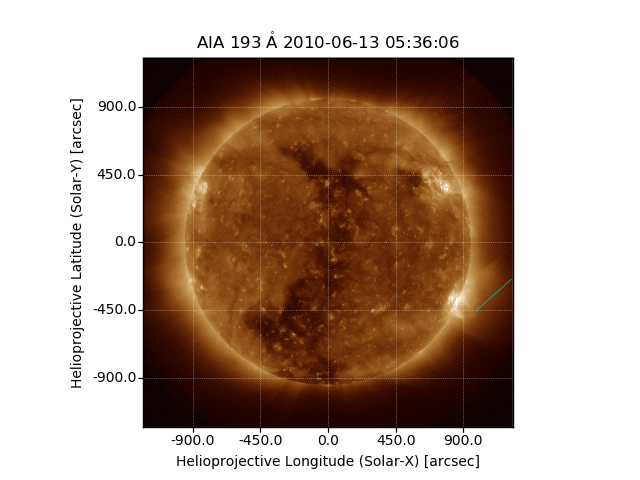

In [8]:
fig = plt.figure() 
ax = plt.subplot(projection=data_maps[30])
data_maps[30].plot(axes=ax)
ax.plot_coord(radial_slits[30], color='c', linewidth=0.5)
plt.show() 

In [11]:
time = data_maps[30].meta['date_obs']
time = datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%f')


** Let's see if the sumbap function works ** 

In [12]:
subMap = analysis.makeSubmap(data_maps[30], 900, -500, 1200, -200 )

<IPython.core.display.Javascript object>


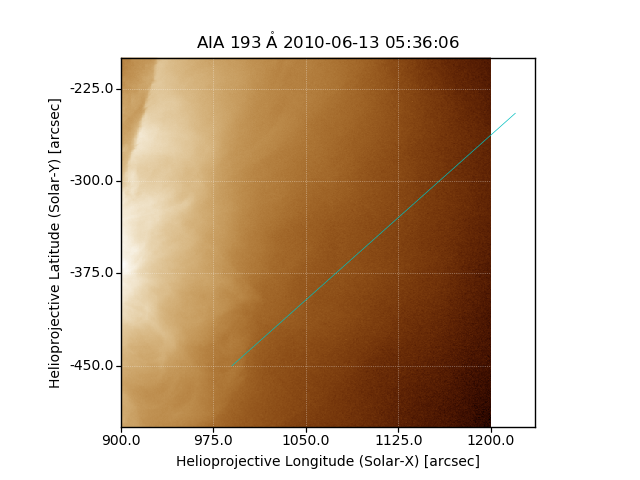

In [13]:
fig = plt.figure() 
ax = plt.subplot(projection = subMap)
subMap.plot(axes=ax) 
ax.plot_coord(radial_slits[30], color='c', linewidth=0.5)

plt.show() 

** Now let's get the slit intensities ** 

In [14]:
raw_slit_intensities = []
distances = [] 

for i in range(len(radial_slits)): 
    intensity_along_slit, distance = analysis.getRadialSlitIntensity(radial_slits[i], data_maps[i])
    raw_slit_intensities.append(intensity_along_slit)
    distances.append(distance) 
    
print(len(distances), len(raw_slit_intensities))

100 100


In [15]:
smoothed_intensities = [] 

for intens in raw_slit_intensities: 
        smoothed_intensities.append(analysis.smoothAndNormalizeSlit(intens)) 

<IPython.core.display.Javascript object>


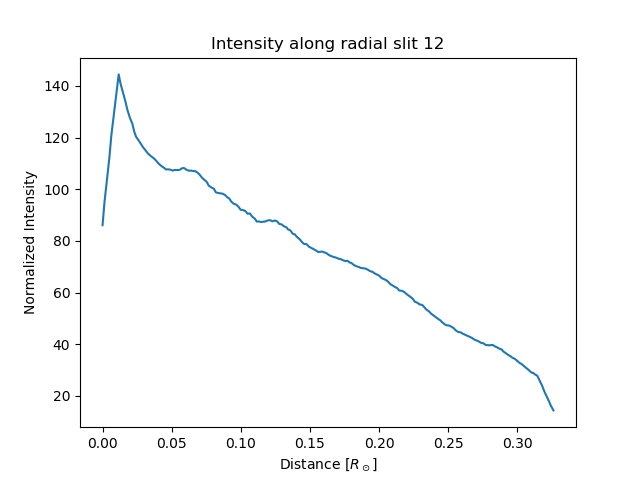

In [16]:
plt.figure() 
plt.plot(distances[12], smoothed_intensities[12])
plt.xlabel('Distance [$R_\odot$]')
plt.ylabel('Normalized Intensity')
plt.title('Intensity along radial slit 12')
plt.show() 

** Now let's stack all of the slit images into a 2-d figure ** 

<IPython.core.display.Javascript object>


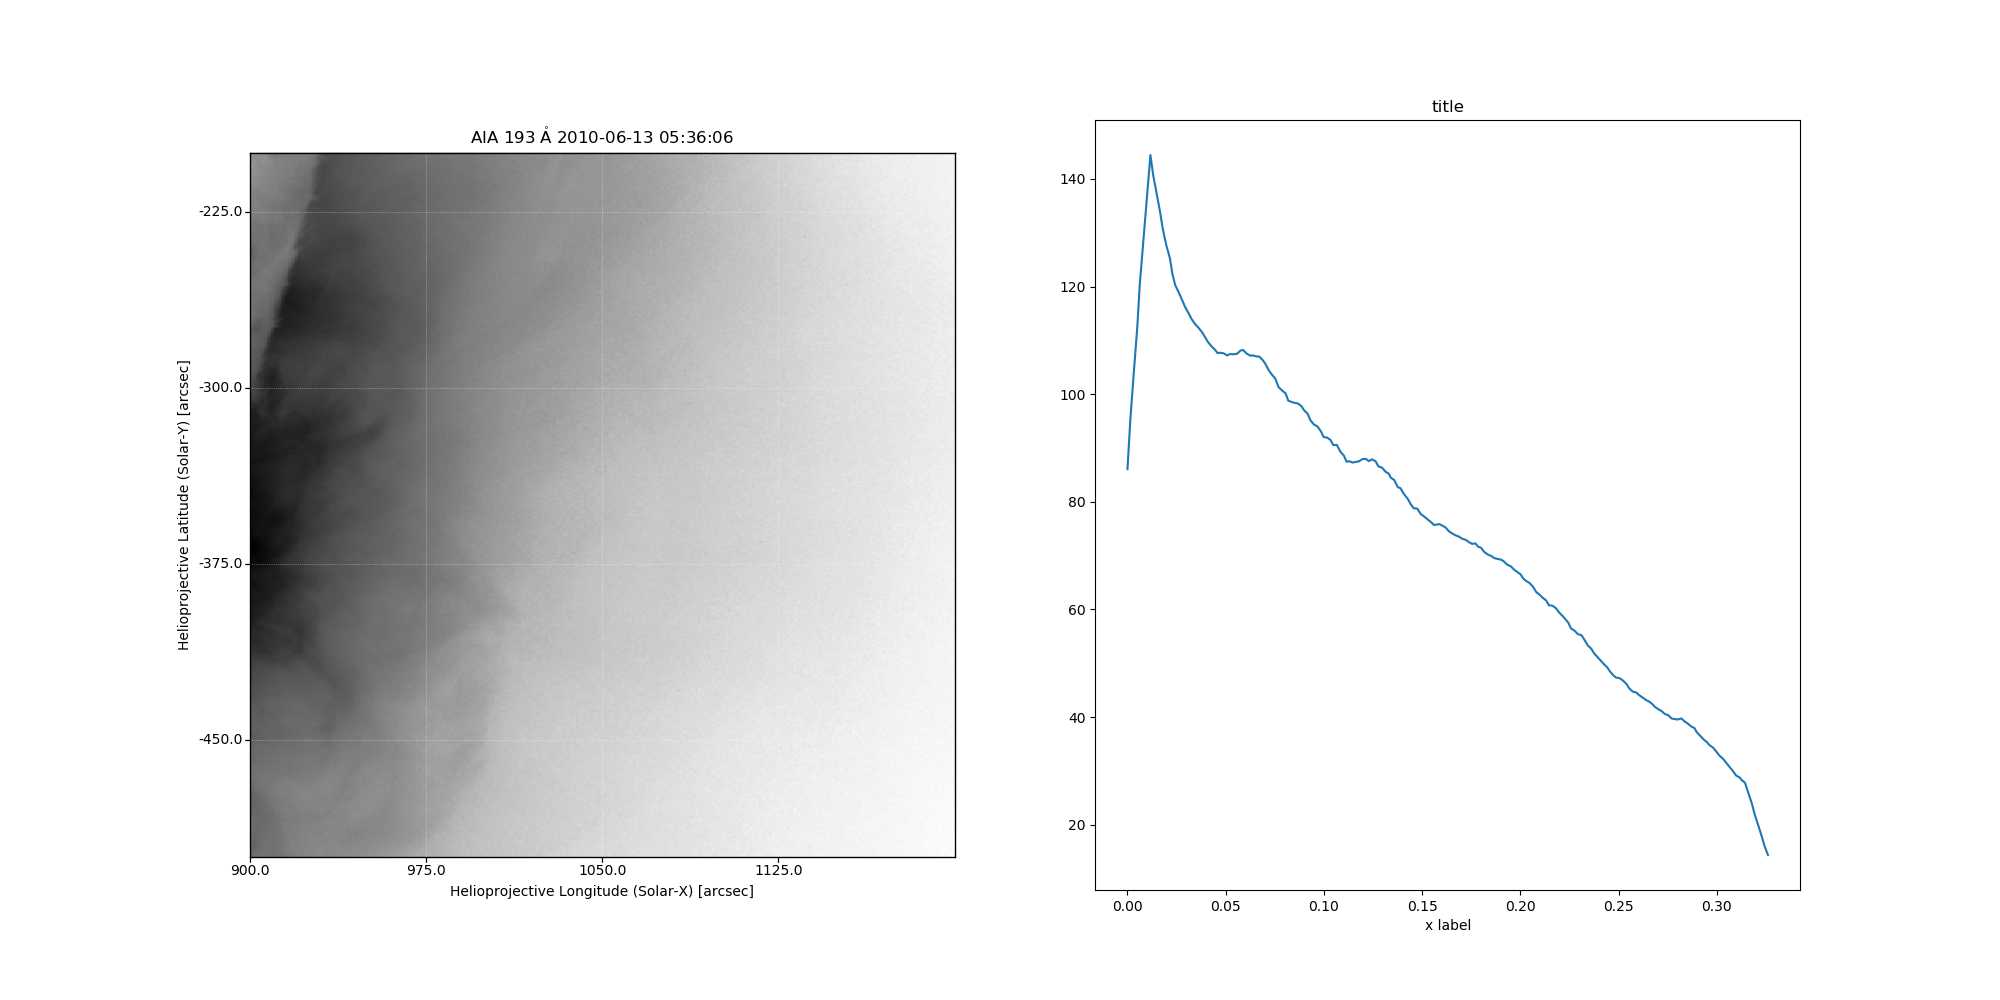

In [17]:
fig1 = plt.figure(figsize=(20,10)) 
ax1 = plt.subplot(121, projection = subMap)
subMap.plot(cmap=plt.cm.Greys)
ax2 = plt.subplot(122) 
ax2.plot(distances[12], smoothed_intensities[12])
ax2.set_xlabel('x label') 
ax2.set_title('title')

plt.show() 

In [19]:
times = analysis.getTimes(data_maps)

(200, 100) (100, 200) (100, 200)


<IPython.core.display.Javascript object>


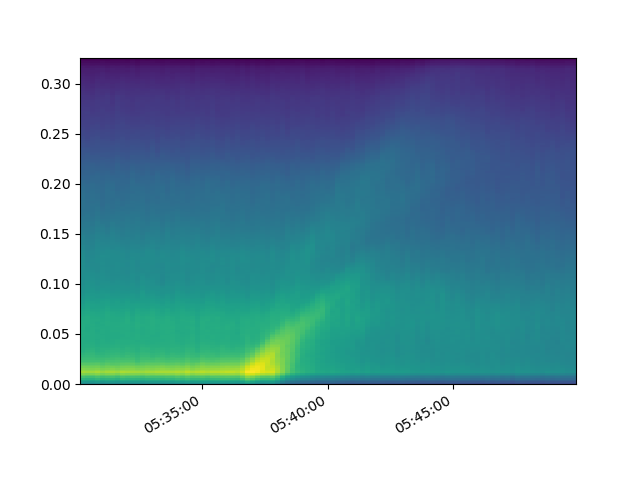

In [20]:
import matplotlib.dates as mdates

shape = np.shape(distances) 
distances = np.asarray(distances) 
assert(np.shape(distances) == np.shape(smoothed_intensities))
ts = [[times[i] for i in range(shape[0])] for j in range(shape[1])]
ts = np.asarray(ts)

print(np.shape(ts), shape, np.shape(smoothed_intensities))

fig, ax = plt.subplots() 
ax.pcolormesh(ts, np.transpose(distances), np.transpose(smoothed_intensities))
fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
plt.show() 

** try to replicate with the function ** 

<IPython.core.display.Javascript object>


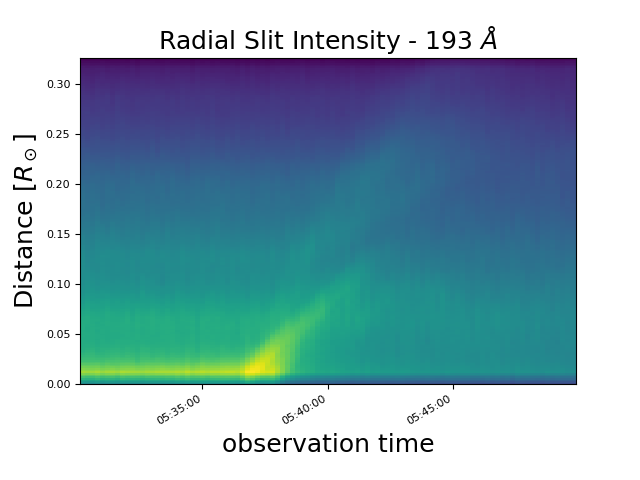

In [22]:
import matplotlib 
fig, ax = plt.subplots()  
analysis.plotRadialStack(times, distances, smoothed_intensities, fig, ax)
ax.set_xlabel("observation time", fontsize=18)
ax.set_ylabel("Distance $[R_\odot]$", fontsize=18)
ax.set_title("Radial Slit Intensity - 193 $\AA$", fontsize=18) 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 






plt.show() 

del data_maps

In [23]:
fits_193 = glob("/data/khnum/REU2018/jwaczak/fitsFiles/193/*.fits")
fits_171 = glob("/data/khnum/REU2018/jwaczak/fitsFiles/171/*.fits")
fits_211 = glob("/data/khnum/REU2018/jwaczak/fitsFiles/211/*.fits")
fits_304 = glob("/data/khnum/REU2018/jwaczak/fitsFiles/304/*.fits")
fits_335 = glob("/data/khnum/REU2018/jwaczak/fitsFiles/335/*.fits")

In [24]:
x_i = 990*u.arcsec 
y_i = -450*u.arcsec 
x_f = 1200*u.arcsec 
y_f = -265*u.arcsec 

radial_slits_171 = [] 
radial_slits_193 = []
radial_slits_211 = []
radial_slits_304 = [] 
radial_slits_335 = [] 

assert(len(i) == len(j) for i,j in [fits_193, fits_171, fits_211, fits_304, fits_335])

for i in range(len(fits_171)): 
    if i%5==0: print(i) 
    map_171 = smap.Map(fits_171[i])
    map_193 = smap.Map(fits_193[i])
    map_211 = smap.Map(fits_211[i])
    map_304 = smap.Map(fits_304[i])
    map_335 = smap.Map(fits_335[i])
    
    radial_slits_171.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_171))
    radial_slits_193.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_193))
    radial_slits_211.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_211))
    radial_slits_304.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_304))
    radial_slits_335.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_335))
    
    del map_171
    del map_193
    del map_211
    del map_304
    del map_335

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [26]:
print(radial_slits_171)

[<SkyCoord (Helioprojective: obstime=2010-06-13 05:30:11.110000, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2010-06-13 05:30:11.110000): (lon, lat, radius) in (deg, deg, m)
    (0., 0.794149, 1.51954769e+11)>): (Tx, Ty) in arcsec
    [( 990.        , -450.        ), ( 991.05527638, -449.07035176),
     ( 992.11055276, -448.14070352), ( 993.16582915, -447.21105528),
     ( 994.22110553, -446.28140704), ( 995.27638191, -445.35175879),
     ( 996.33165829, -444.42211055), ( 997.38693467, -443.49246231),
     ( 998.44221106, -442.56281407), ( 999.49748744, -441.63316583),
     (1000.55276382, -440.70351759), (1001.6080402 , -439.77386935),
     (1002.66331658, -438.84422111), (1003.71859296, -437.91457286),
     (1004.77386935, -436.98492462), (1005.82914573, -436.05527638),
     (1006.88442211, -435.12562814), (1007.93969849, -434.1959799 ),
     (1008.99497487, -433.26633166), (1010.05025126, -432.33668342),
     (1011.10552764, -431.40703518), (1012.1608040

In [28]:
slit_intensities = {'171':[], '193':[], '211':[], '304':[], '335':[]}
distances = {'171':[], '193':[], '211':[], '304':[], '335':[]}

print(len(radial_slits_171))
for i in range(len(radial_slits_171)): 
        if i%5==0: print(i) 
        i171, d171 = analysis.getRadialSlitIntensity(radial_slits_171[i], smap.Map(fits_171[i]))
        i193, d193 = analysis.getRadialSlitIntensity(radial_slits_193[i], smap.Map(fits_193[i]))
        i211, d211 = analysis.getRadialSlitIntensity(radial_slits_211[i], smap.Map(fits_211[i]))
        i304, d304 = analysis.getRadialSlitIntensity(radial_slits_304[i], smap.Map(fits_304[i]))
        i335, d335 = analysis.getRadialSlitIntensity(radial_slits_335[i], smap.Map(fits_335[i]))
        
        slit_intensities['171'].append(analysis.smoothAndNormalizeSlit(i171))
        distances['171'].append(d171)
        
        slit_intensities['193'].append(analysis.smoothAndNormalizeSlit(i193))
        distances['193'].append(d193)
        
        slit_intensities['211'].append(analysis.smoothAndNormalizeSlit(i211))
        distances['211'].append(d211)
        
        slit_intensities['304'].append(analysis.smoothAndNormalizeSlit(i304))
        distances['304'].append(d304)
        
        slit_intensities['335'].append(analysis.smoothAndNormalizeSlit(i335))
        distances['335'].append(d335)
        


100
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [29]:
times_171 = analysis.getTimes(smap.Map(fits_171))
times_193 = analysis.getTimes(smap.Map(fits_193))
times_211 = analysis.getTimes(smap.Map(fits_211))
times_304 = analysis.getTimes(smap.Map(fits_304))
times_335 = analysis.getTimes(smap.Map(fits_335))

<IPython.core.display.Javascript object>


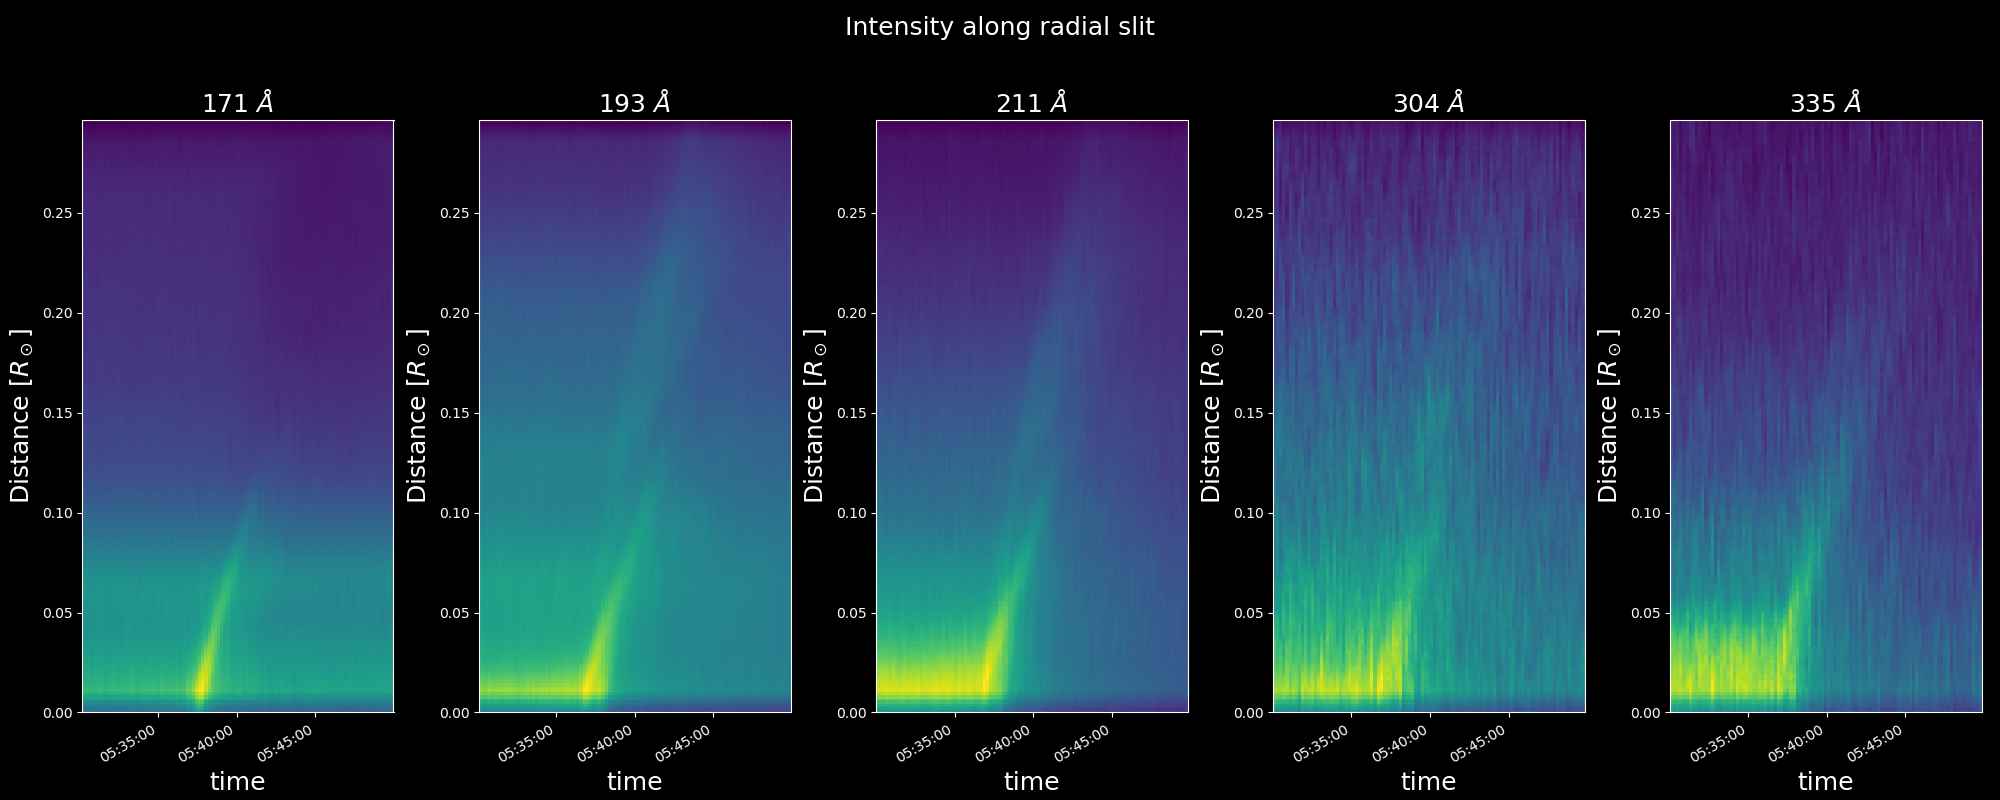

In [58]:
import matplotlib
with matplotlib.pyplot.style.context(("dark_background")):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,8)) 

    analysis.plotRadialStack(times_171, distances['171'], slit_intensities['171'], fig, ax[0])
    ax[0].set_xlabel("time", fontsize=18)
    ax[0].set_ylabel("Distance $[R_\odot]$", fontsize=18)
    ax[0].set_title("171 $\AA$", fontsize=18)

    analysis.plotRadialStack(times_193, distances['193'], slit_intensities['193'], fig, ax[1])
    ax[1].set_xlabel("time", fontsize=18)
    ax[1].set_ylabel("Distance $[R_\odot]$", fontsize=18)
    ax[1].set_title("193 $\AA$", fontsize=18)

    analysis.plotRadialStack(times_211, distances['211'], slit_intensities['211'], fig, ax[2])
    ax[2].set_xlabel("time", fontsize=18)
    ax[2].set_ylabel("Distance $[R_\odot]$", fontsize=18)
    ax[2].set_title("211 $\AA$", fontsize=18)

    analysis.plotRadialStack(times_304, distances['304'], slit_intensities['304'], fig, ax[3])
    ax[3].set_xlabel("time", fontsize=18)
    ax[3].set_ylabel("Distance $[R_\odot]$", fontsize=18)
    ax[3].set_title("304 $\AA$", fontsize=18)

    analysis.plotRadialStack(times_335, distances['335'], slit_intensities['335'], fig, ax[4])
    ax[4].set_xlabel("time", fontsize=18)
    ax[4].set_ylabel("Distance $[R_\odot]$", fontsize=18)
    ax[4].set_title("335 $\AA$", fontsize=18)
  
    plt.tight_layout()

    ax[0].tick_params(axis='both', which='major', labelsize=10)
    ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[2].tick_params(axis='both', which='major', labelsize=10)
    ax[3].tick_params(axis='both', which='major', labelsize=10)
    ax[4].tick_params(axis='both', which='major', labelsize=10)

    fig.suptitle('Intensity along radial slit', fontsize=18)
    plt.subplots_adjust(top=0.85)
    
    plt.savefig('/data/khnum/REU2018/jwaczak/data/intensityAlongSlit.png', transparent=True)
    plt.show() 

